Celda desdicadad a inicializar la libreria de Tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


Celda dedicada a inicializar el resto de bibliotecas utilziadas

In [ ]:

from tensorflow import keras as kr
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Reshape,Dropout
from keras.optimizers import AdamW,Adamax,Adagrad,Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.losses import Huber, MeanSquaredError,CategoricalCrossentropy

import pickle


Celda para trabajar en Google colab, permite entrar va los archivos presentes en Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Reshape
from keras.optimizers import AdamW,Adamax,Adagrad,Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.losses import Huber, MeanSquaredError
import tensorflow as tf

def modelo_mejorado():
    input_1 = tf.keras.Input(shape=(253, 5))
    input_2 = tf.keras.Input(shape=(253, 5))
    
    x1 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_1)
    x1 = tf.keras.layers.MaxPooling1D(2)(x1)

    
    x2 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_2)
    x2 = tf.keras.layers.MaxPooling1D(2)(x2)
    
    combined = tf.keras.layers.concatenate([x1, x2])
    
    combined = tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same')(combined)
    combined = tf.keras.layers.Activation('mish')(combined)  # Capa de activación intermedia
    combined = tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same')(combined)
    combined = tf.keras.layers.Activation('selu')(combined)  # Otra capa de activación intermedia
    combined = tf.keras.layers.MaxPooling1D(2)(combined)

    combined = tf.keras.layers.Flatten()(combined)
    
    outputs = tf.keras.layers.Dense(253 * 4, activation='relu')(combined)
    outputs = tf.keras.layers.Reshape((253, 4))(outputs)
    outputs = tf.keras.layers.Activation('softmax')(outputs)

    lr_schedule = ExponentialDecay(initial_learning_rate=0.1, decay_steps=10000, decay_rate=0.9)
    optimizer = Adamax(learning_rate=lr_schedule)
    loss = Huber(delta=0.5, reduction="auto", name="huber_loss")
    
    model = tf.keras.Model(inputs=[input_1, input_2], outputs=outputs)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy', 'mse', 'mae'])
    model.summary()
    return model




modelo tipo 3, seq to seq

In [ ]:
def model_cnn_4i_lstm_with_dropout_2():
    input_1 = tf.keras.Input(shape=(253, 5))
    input_2 = tf.keras.Input(shape=(253, 5))
    input_3 = tf.keras.Input(shape=(253, 1))
    input_4 = tf.keras.Input(shape=(253, 1))

    # Convoluciones iniciales para inputs 1 y 2
    x1 = tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same')(input_1)
    x1 = tf.keras.layers.MaxPooling1D(2)(x1)

    x2 = tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same')(input_2)
    x2 = tf.keras.layers.MaxPooling1D(2)(x2)

    # Convoluciones iniciales para inputs 3 y 4
    x3 = tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same')(input_3)
    x3 = tf.keras.layers.MaxPooling1D(2)(x3)

    x4 = tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same')(input_4)
    x4 = tf.keras.layers.MaxPooling1D(2)(x4)

    # Concatenar los resultados de todas las entradas
    x = tf.keras.layers.Concatenate(axis=2)([x1, x2, x3, x4])
    x=tf.keras.layers.Dropout(0.3)(x)
    # Capa adicional convolucional para ajustar dimensiones antes de la LSTM
    x = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)

    # Capa LSTM
    x = tf.keras.layers.LSTM(32, return_sequences=True)(x)

    # Reducción de dimensiones con capas Dense adicionales y Dropout
    # Capas adicionales con diferentes funciones de activación
    x = tf.keras.layers.Dense(16, activation='softmax')(x)
    x = tf.keras.layers.Dense(8, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Flatten()(x)

    # Salida final con la forma deseada (None, 253, 4)
    outputs = tf.keras.layers.Dense(253 * 5, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((253, 5))(outputs)

    optimizer = tf.keras.optimizers.Adam()
    #loss = Huber(delta=0.5, reduction="auto", name="huber_loss")
    loss='categorical_crossentropy'
    model = tf.keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=outputs)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy', 'mse', 'mae', tf.keras.metrics.RootMeanSquaredError()])
    model.summary()
    return model
#lp=model_cnn_4i_lstm_with_dropout_2()

In [ ]:
def model_cnn_4i_lstm_with_dropout():
    input_1 = tf.keras.Input(shape=(253, 5))
    input_2 = tf.keras.Input(shape=(253, 5))
    input_3 = tf.keras.Input(shape=(253, 1))
    input_4 = tf.keras.Input(shape=(253, 1))

    # Convoluciones iniciales para inputs 1 y 2
    x1 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_1)
    x1 = tf.keras.layers.MaxPooling1D(2)(x1)

    x2 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_2)
    x2 = tf.keras.layers.MaxPooling1D(2)(x2)

    # Convoluciones iniciales para inputs 3 y 4
    x3 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_3)
    x3 = tf.keras.layers.MaxPooling1D(2)(x3)

    x4 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_4)
    x4 = tf.keras.layers.MaxPooling1D(2)(x4)

    # Concatenar los resultados de todas las entradas
    x = tf.keras.layers.Concatenate(axis=2)([x1, x2, x3, x4])
    x=tf.keras.layers.Dropout(0.3)(x)
    # Capa adicional convolucional para ajustar dimensiones antes de la LSTM
    x = tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)

    # Capa LSTM
    x = tf.keras.layers.LSTM(64, return_sequences=True)(x)

    # Reducción de dimensiones con capas Dense adicionales y Dropout
    # Capas adicionales con diferentes funciones de activación
    x = tf.keras.layers.Dense(16, activation='softmax')(x)
    x = tf.keras.layers.Dense(8, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Flatten()(x)

    # Salida final con la forma deseada (None, 253, 4)
    outputs = tf.keras.layers.Dense(253 * 5, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((253, 5))(outputs)

    optimizer = tf.keras.optimizers.Adam()
    #loss = Huber(delta=0.5, reduction="auto", name="huber_loss")
    loss='categorical_crossentropy'
    model = tf.keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=outputs)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy', 'mse', 'mae', tf.keras.metrics.RootMeanSquaredError()])
    model.summary()
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import Huber

def model_cnn_4i_no_lstm_with_dropout():
    input_1 = tf.keras.Input(shape=(253, 4))
    input_2 = tf.keras.Input(shape=(253, 4))
    input_3 = tf.keras.Input(shape=(253, 1))
    input_4 = tf.keras.Input(shape=(253, 1))

    # Convoluciones iniciales para inputs 1 y 2
    x1 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_1)
    x1 = tf.keras.layers.MaxPooling1D(2)(x1)

    x2 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_2)
    x2 = tf.keras.layers.MaxPooling1D(2)(x2)

    # Convoluciones iniciales para inputs 3 y 4
    x3 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_3)
    x3 = tf.keras.layers.MaxPooling1D(2)(x3)

    x4 = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(input_4)
    x4 = tf.keras.layers.MaxPooling1D(2)(x4)

    # Concatenar los resultados de todas las entradas
    x = tf.keras.layers.Concatenate(axis=2)([x1, x2, x3, x4])
    x=tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    # Reducción de dimensiones con capas Dense adicionales y Dropout
    x = tf.keras.layers.Dense(16, activation='softmax')(x)
    x = tf.keras.layers.Dense(8, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Flatten()(x)

    # Salida final con la forma deseada (None, 253, 4)
    outputs = tf.keras.layers.Dense(253 * 4, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((253, 4))(outputs)

    optimizer = tf.keras.optimizers.Adam()
    #loss = Huber(delta=0.5, reduction="auto", name="huber_loss")

    model = tf.keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'mse', 'mae', tf.keras.metrics.RootMeanSquaredError()])
    model.summary()
    return model

In [ ]:
#asignar modelo
#model=model_cnn_lstm_with_dropout()
#model =model_5()
#model =model_with_rnn()
#model=model_with_rnn2()
#model=model_with_rnn_and_l1()
model= model_cnn_4i_lstm_with_dropout_2()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 253, 5)]             0         []                            
                                                                                                  
 input_26 (InputLayer)       [(None, 253, 5)]             0         []                            
                                                                                                  
 input_27 (InputLayer)       [(None, 253, 1)]             0         []                            
                                                                                                  
 input_28 (InputLayer)       [(None, 253, 1)]             0         []                            
                                                                                            

In [ ]:
def train_model(model,input_1,input_2,input_3,input_4, targets, batch_size=32,epochs=2):
  return model.fit(
    x=[input_1,input_2,input_3,input_4],
    y=targets,
    batch_size=200,
    epochs=100,
    validation_split=0.2
  )


In [ ]:
# Inicializa  parametros del modelos
initial_epoch = 0
epoch=10
aux = 1
history_model=[]
batch_size = 10

In [ ]:
a=[]
b=[]
c=[]
for i in range(1, aux + 1):
    try:

        print("Iteración:", i)
        print("Cargando datos")
        encoded_fr = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_fr_{i}.npy")
        encoded_rv = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_rv_{i}.npy")
        encoded_tg = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_tg_{i}.npy")

        #a.append(encoded_fr)
        #b.append(encoded_rv)
        #c.append(encoded_tg)


        #data_1 = encoded_fr.reshape(-1, 253, 5, 1)

        #data_2 = encoded_rv.reshape(-1, 253, 5, 1)
        #data_3 = encoded_tg.reshape(-1, 253, 4, 1)


        #concatenated_sequence = tf.concat([data_1[:, tf.newaxis], data_2[:, tf.newaxis]], axis=1)
        concatenated_sequence = tf.concat([encoded_fr[:, tf.newaxis], encoded_rv[:, tf.newaxis]], axis=1)
        a.append(concatenated_sequence)
        b.append(encoded_tg)
        print(encoded_tg.shape)


        historyprob = train_model2(
                model,
                concatenated_sequence,
                #data_3,
                encoded_tg,

                epochs=100
                #initial_epoch=initial_epoch
            )

        #history_model.append(history)
        #model.save(f'modelo_provisorio_{i}.keras')
    except Exception as e:
        print(f"Ocurrió un error en la iteración {i}: {e}")
        pass

#a = np.concatenate(a, axis=0)

#b = np.concatenate(b, axis=0)
#c = np.concatenate(c, axis=0)

#print(a.shape)
#print(b.shape)
#print(c.shape)


Iteración: 1
Cargando datos
(2304, 253, 4)
Epoch 1/100
7/7 [==============================] - 11s 445ms/step - loss: 0.4430 - accuracy: 0.5296 - mse: 0.1953 - mae: 0.2677 - root_mean_squared_error: 0.4419 - val_loss: 0.3579 - val_accuracy: 0.6892 - val_mse: 0.1191 - val_mae: 0.2475 - val_root_mean_squared_error: 0.3451
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3405 - accuracy: 0.7196 - mse: 0.1067 - mae: 0.2192 - root_mean_squared_error: 0.3266 - val_loss: 0.3231 - val_accuracy: 0.7302 - val_mse: 0.0977 - val_mae: 0.1814 - val_root_mean_squared_error: 0.3125
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 0.3157 - accuracy: 0.7320 - mse: 0.0951 - mae: 0.1773 - root_mean_squared_error: 0.3083 - val_loss: 0.3034 - val_accuracy: 0.7304 - val_mse: 0.0908 - val_mae: 0.1761 - val_root_mean_squared_error: 0.3013
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3000 - accuracy: 0.7316 - mse: 0.0920 - mae: 0.1799 -

KeyboardInterrupt: ignored

In [ ]:
model.save(f"/content/drive/MyDrive/contigs/modelo_cont1_mse_con_m500_ep.keras")

Epoch 150/150
593/593 [==============================] - 9s 15ms/step - loss: 0.0543 - accuracy: 0.5899 - mse: 0.1321 - mae: 0.2452 - val_loss: 0.0534 - val_accuracy: 0.6008 - val_mse: 0.1293 - val_mae: 0.2450



In [ ]:
import pickle

In [ ]:
with open(f'/content/drive/MyDrive/contigs/contigscont{2}', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model = tf.keras.model.load("/content/drive/MyDrive/contigs/modelo_cnn_ltsm_2param_ree17.keras")


AttributeError: ignored

In [ ]:
#with open('/trainHistoryDict', "rb") as file_pi:
#    history = pickle.load(file_pi)

In [ ]:
test_fr = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_fr_{148}.npy")
test_rv = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_rv_{148}.npy")
test_tg = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_tg_{148}.npy")

concatenated_test = tf.concat([test_fr[:, tf.newaxis], test_rv[:, tf.newaxis]], axis=1)

#accuracy = model.evaluate(concatenated_test,test_tg)


print(test_fr.shape)


(2206, 253, 5)


In [ ]:
accuracy = model.evaluate(concatenated_test,test_tg)
for item in accuracy:
  print(item)

69/69 [==============================] - 1s 8ms/step - loss: 0.0394 - accuracy: 0.9020 - mse: 0.0391 - mae: 0.0825 - root_mean_squared_error: 0.1977
0.03944030776619911
0.9019830822944641
0.039083171635866165
0.0825338140130043
0.19769464433193207


In [ ]:
for item in accuracy:
  print(item)

0.052179086953401566
0.8585218191146851
0.05184756591916084
0.0922369435429573
0.2277006059885025


In [ ]:
largos_seqs=[]
for i in range(0,29):
  a=[]
  b=[]
  c=[]
  from google.colab import drive
  drive.mount('/content/drive')
  for j in range(1,11):
    try:
      iteracion=((i*10)+j)
      print("Iteración:", iteracion)
      print("Cargando datos")
      encoded_fr = np.load(f"/content/drive/MyDrive/contigs/seqs3/encoded_fr_{iteracion}.npy")
      encoded_rv = np.load(f"/content/drive/MyDrive/contigs/seqs3/encoded_rv_{iteracion}.npy")
      encoded_tg = np.load(f"/content/drive/MyDrive/contigs/seqs3/encoded_tg_{iteracion}.npy")

      #concatenated_sequence = tf.concat([encoded_fr[:, tf.newaxis], encoded_rv[:, tf.newaxis]], axis=1)
      #a.append(concatenated_sequence)
      #b.append(encoded_tg)
      a.append(encoded_fr)
      b.append(encoded_rv)
      c.append(encoded_tg)
      print("datos cargados con exito")
    except Exception as e:
      print(f"Ocurrió un error en la iteración {i}: {e}")
      pass

  a = np.concatenate(a, axis=0)
  b = np.concatenate(b, axis=0)
  c = np.concatenate(c, axis=0)
  largos_seqs.append(len(b))
  #print(c.shape)
  print(f"comenzando entrenamiento{i+1}")

  history = train_model(
      model,
      a,
      b,
      c,
      epochs=100
      )
  name=f'/content/drive/MyDrive/contigs/cnn_lstm_nrl_2input_pt2{i}'
  model.save(f"/content/drive/MyDrive/contigs/lstm_nrl_pt2{i}cont_2pinput.keras")

  with open(name, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
aux2=0
for num in largos_seqs:
  aux2+=num

print(aux2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Iteración: 1
Cargando datos
datos cargados con exito
Iteración: 2
Cargando datos
datos cargados con exito
Iteración: 3
Cargando datos
datos cargados con exito
Iteración: 4
Cargando datos
datos cargados con exito
Iteración: 5
Cargando datos
datos cargados con exito
Iteración: 6
Cargando datos
datos cargados con exito
Iteración: 7
Cargando datos
datos cargados con exito
Iteración: 8
Cargando datos
datos cargados con exito
Iteración: 9
Cargando datos
datos cargados con exito
Iteración: 10
Cargando datos
datos cargados con exito
comenzando entrenamiento1
Epoch 1/200
56/56 [==============================] - 1s 23ms/step - loss: 0.0070 - accuracy: 0.9507 - mse: 0.0169 - mae: 0.0283 - root_mean_squared_error: 0.1299 - val_loss: 0.0172 - val_accuracy: 0.8908 - val_mse: 0.0430 - val_mae: 0.0559 - val_root_mean_squared_error: 0.2074
Epoch 2/200
56/56 [=================

KeyboardInterrupt: ignored

0.86

In [ ]:
largos_seqs=[]
for i in range(15,60):
  a=[]
  b=[]
  c=[]
  qa=[]
  qb=[]
  from google.colab import drive
  drive.mount('/content/drive')
  for j in range(1,3):
    try:
      iteracion=((i*2)+j)
      print("Iteración:", iteracion)
      print("Cargando datos")
      encoded_fr = np.load(f"/content/drive/MyDrive/contigs/seqs4/encoded_fr_{iteracion}.npy")
      qual_fr = np.load(f"/content/drive/MyDrive/contigs/seqs4/qual_fr_{iteracion}.npy")
      qual_rv = np.load(f"/content/drive/MyDrive/contigs/seqs4/qual_rv_{iteracion}.npy")
      encoded_rv = np.load(f"/content/drive/MyDrive/contigs/seqs4/encoded_rv_{iteracion}.npy")
      encoded_tg = np.load(f"/content/drive/MyDrive/contigs/seqs4/encoded_tg_{iteracion}.npy")

      #concatenated_sequence = tf.concat([encoded_fr[:, tf.newaxis], encoded_rv[:, tf.newaxis]], axis=1)
      #a.append(concatenated_sequence)

      #b.append(encoded_tg)
      a.append(encoded_fr)
      b.append(encoded_rv)
      qa.append(qual_fr)
      qb.append(qual_rv)
      c.append(encoded_tg)
      print("datos cargados con exito")
    except Exception as e:
      print(f"Ocurrió un error en la iteración {i}: {e}")
      pass

  a = np.concatenate(a, axis=0)
  b = np.concatenate(b, axis=0)
  qa= np.concatenate(qa, axis=0)
  qb = np.concatenate(qb, axis=0)
  c = np.concatenate(c, axis=0)
  largos_seqs.append(len(b))
  #print(c.shape)
  print(f"comenzando entrenamiento{i+1}")

  history=model.fit(
            x=[a,
            b,
            qa,
            qb],
            y=c,
            batch_size=100,
            epochs=100,
            validation_split=0.2
        )
  #name=f'/content/drive/MyDrive/contigs/modelo_cnn_nolstm_ultt{i}'
  name=f'/content/drive/MyDrive/contigs/cnn_nolstm_ultt{i}'
  model.save(f"/content/drive/MyDrive/contigs/cnn_nolstm_ultt{i}.keras")

  with open(name, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Iteración: 31
Cargando datos
datos cargados con exito
Iteración: 32
Cargando datos
datos cargados con exito
comenzando entrenamiento16
Epoch 1/100
26/26 [==============================] - 6s 221ms/step - loss: 0.0321 - accuracy: 0.9863 - mse: 0.0457 - mae: 0.0567 - root_mean_squared_error: 0.2137 - val_loss: 0.0623 - val_accuracy: 0.9863 - val_mse: 0.0427 - val_mae: 0.0528 - val_root_mean_squared_error: 0.2068
Epoch 2/100
26/26 [==============================] - 3s 121ms/step - loss: 0.0334 - accuracy: 0.9862 - mse: 0.0441 - mae: 0.0548 - root_mean_squared_error: 0.2099 - val_loss: 0.0615 - val_accuracy: 0.9863 - val_mse: 0.0414 - val_mae: 0.0511 - val_root_mean_squared_error: 0.2034
Epoch 3/100
26/26 [==============================] - 2s 79ms/step - loss: 0.0338 - accuracy: 0.9863 - mse: 0.0443 - mae: 0.0550 - root_mean_squared_error: 0.2104 - val_loss: 0.06

In [ ]:
aux2=0
for num in largos_seqs:
  aux2+=num

print(aux2)

378611


378611??


680428
post
469319 pre


Epoch 50/50
593/593 [==============================] - 5s 9ms/step - loss: 1.3394 - accuracy: 0.6132 - mse: 0.0686 - mae: 0.1625 - val_loss: 1.3447 - val_accuracy: 0.6155 - val_mse: 0.0664 - val_mae: 0.1572



Epoch 50/50
593/593 [==============================] - 5s 8ms/step - loss: 0.0310 - accuracy: 0.6117 - mse: 0.0664 - mae: 0.1635 - val_loss: 0.0302 - val_accuracy: 0.6125 - val_mse: 0.0645 - val_mae: 0.1597




Epoch 90/100
283/290 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.5870 - mse: 0.0589 - mae: 0.1527
stuck at 0.58-9



Epoch 100/100
138/138 [==============================] - 5s 40ms/step - loss: 0.1860 - accuracy: 0.3707 - mse: 0.1860 - val_loss: 0.1870 - val_accuracy: 0.3560 - val_mse: 0.1870


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 253, 5)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 253, 5)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 253, 1)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 253, 1)]             0         []                            
                                                                                              

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

KeyError: ignored

<Figure size 640x480 with 0 Axes>

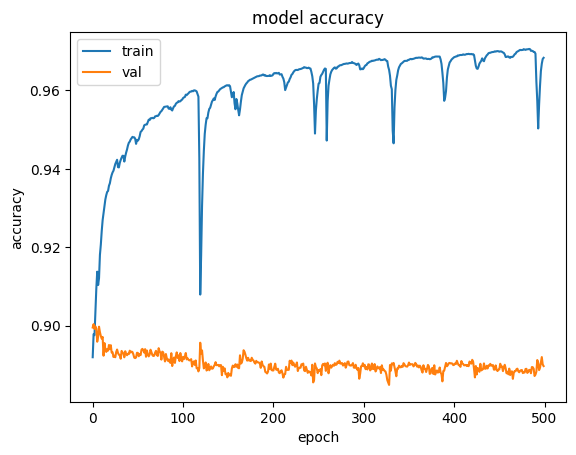

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

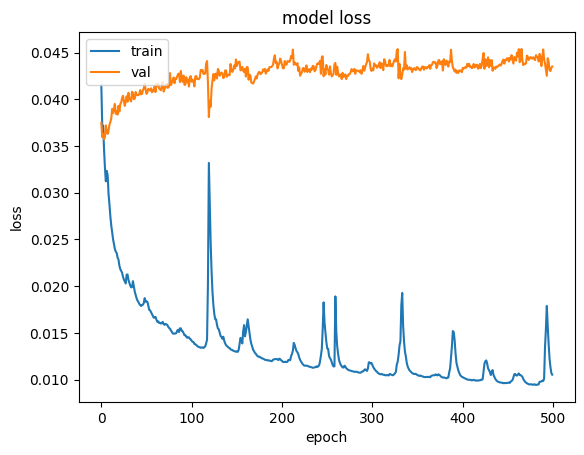

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

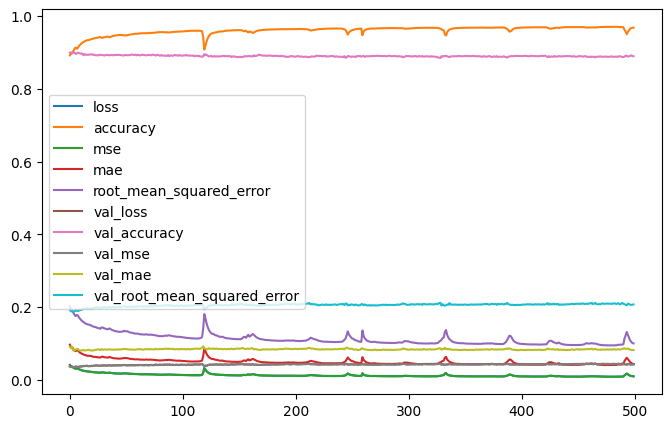

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:


model= tf.keras.models.load_model('/content/cnn_lstm_pt293ultt.keras')

In [ ]:
#modelo1= tf.keras.models.load_model('/content/drive/MyDrive/contigs/modelo_150_cont9_mse_con_m500_ep.keras')
#modelornn2= tf.keras.models.load_model('/content/drive/MyDrive/contigs/modeloRRN2_150_cont13_mse_con_m500_ep.keras')
#modelo13= tf.keras.models.load_model('/content/drive/MyDrive/contigs/modelo3_150_cont13_mse_con_m500_ep.keras')
#medelo1= tf.keras.models.load_model('/content/drive/MyDrive/contigs/modelo_150_cont9_mse_con_m500_ep.keras')
modelo_lstmnrl= tf.keras.models.load_model('/content/drive/MyDrive/contigs/cnn_lstm_norl13cont.keras')


modelo_x= tf.keras.models.load_model('/content/drive/MyDrive/contigs/cnn_lstm_pt29cont.keras')


In [ ]:
modelo_x.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 2, 253, 5)]       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 2, 253, 32)        1472      
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 2, 126, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 2, 126, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 2, 63, 64)         0         
 ng2D)                                                           
                                                                 
 permute_27 (Permute)        (None, 63, 2, 64)         0  

In [ ]:
modelo_lstmnrl.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 253, 5)]             0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 253, 5)]             0         []                            
                                                                                                  
 conv1d_6 (Conv1D)           (None, 253, 32)              512       ['input_6[0][0]']             
                                                                                                  
 conv1d_7 (Conv1D)           (None, 253, 32)              512       ['input_7[0][0]']             
                                                                                            

In [ ]:
modelornn2.summary()


NameError: ignored

In [ ]:
modelo13.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 2, 253, 5)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 253, 32)        1472      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 2, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 127, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 64, 64)         0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 2, 64, 64)         0  

In [ ]:
modelo1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 253, 5)]       0         
                                                                 
 conv2d (Conv2D)             (None, 2, 253, 32)        1472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 127, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 64, 64)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 2, 64, 64)         0     

In [ ]:
test_fr = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_fr_{150}.npy")
test_rv = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_rv_{150}.npy")
test_tg = np.load(f"/content/drive/MyDrive/contigs/seqs2/encoded_tg_{150}.npy")

concatenated_test = tf.concat([test_fr[:, tf.newaxis], test_rv[:, tf.newaxis]], axis=1)

#accuracy = model.evaluate(concatenated_test,test_tg)


print(test_fr.shape)


(830, 253, 5)


In [ ]:
accuracy = model.evaluate([test_fr,test_rv],test_tg)
for item in accuracy:
  print(item)
  #modelo cnn lstm regresor

26/26 [==============================] - 1s 17ms/step - loss: 0.0227 - accuracy: 0.8578 - mse: 0.0572 - mae: 0.0720 - root_mean_squared_error: 0.2391
0.022738710045814514
0.8578408360481262
0.05716289207339287
0.07201854884624481
0.23908762633800507


26/26 [==============================] - 0s 8ms/step - loss: 0.0527 - accuracy: 0.8644 - mse: 0.0523 - mae: 0.0973 - root_mean_squared_error: 0.2287


226/226 [==============================] - 2s 10ms/step - loss: 0.0488 - accuracy: 0.8794 - mse: 0.0485 - mae: 0.0910 - root_mean_squared_error: 0.2201


69/69 [==============================] - 1s 11ms/step - loss: 0.0394 - accuracy: 0.9020 - mse: 0.0391 - mae: 0.0825 - root_mean_squared_error: 0.1977


10/10 [==============================] - 0s 11ms/step - loss: 0.0494 - accuracy: 0.8725 - mse: 0.0490 - mae: 0.0934 - root_mean_squared_error: 0.2214


In [ ]:
accuracy = modelornn2.evaluate(concatenated_test,test_tg)
for item in accuracy:
  print(item)

26/26 [==============================] - 0s 11ms/step - loss: 0.0522 - accuracy: 0.8585 - mse: 0.0518 - mae: 0.0922 - root_mean_squared_error: 0.2277
0.052179086953401566
0.8585218191146851
0.05184756591916084
0.0922369435429573
0.2277006059885025


26/26 [==============================] - 0s 11ms/step - loss: 0.0522 - accuracy: 0.8585 - mse: 0.0518 - mae: 0.0922 - root_mean_squared_error: 0.2277

226/226 [==============================] - 3s 13ms/step - loss: 0.0459 - accuracy: 0.8799 - mse: 0.0456 - mae: 0.0819 - root_mean_squared_error: 0.2135

69/69 [==============================] - 1s 10ms/step - loss: 0.0366 - accuracy: 0.9009 - mse: 0.0363 - mae: 0.0695 - root_mean_squared_error: 0.1905

10/10 [==============================] - 2s 13ms/step - loss: 0.0456 - accuracy: 0.8801 - mse: 0.0452 - mae: 0.0799 - root_mean_squared_error: 0.2127

In [ ]:
accuracy = modelo1.evaluate(concatenated_test,test_tg)
for item in accuracy:
  print(item)

26/26 [==============================] - 0s 3ms/step - loss: 0.0529 - mse: 0.0529 - mae: 0.0703 - root_mean_squared_error: 0.2300
0.05291222780942917
0.05291222780942917
0.07028007507324219
0.23002657294273376


26/26 [==============================] - 0s 3ms/step - loss: 0.0529 - mse: 0.0529 - mae: 0.0703 - root_mean_squared_error: 0.2300

226/226 [==============================] - 1s 5ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.0630 - root_mean_squared_error: 0.2162

226/226 [==============================] - 1s 5ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.0630 - root_mean_squared_error: 0.2162

10/10 [==============================] - 2s 26ms/step - loss: 0.0489 - mse: 0.0489 - mae: 0.0668 - root_mean_squared_error: 0.2212

In [ ]:
accuracy = modelo13.evaluate(concatenated_test,test_tg)
for item in accuracy:
  print(item)

26/26 [==============================] - 4s 15ms/step - loss: 0.0553 - accuracy: 0.8658 - mse: 0.0553 - mae: 0.0663 - root_mean_squared_error: 0.2353
0.05534282699227333
0.8657745718955994
0.05534283071756363
0.06634339690208435
0.2352505624294281


26/26 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.8658 - mse: 0.0553 - mae: 0.0663 - root_mean_squared_error: 0.2353

226/226 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.8826 - mse: 0.0486 - mae: 0.0581 - root_mean_squared_error: 0.2205

69/69 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9045 - mse: 0.0382 - mae: 0.0474 - root_mean_squared_error: 0.1955

10/10 [==============================] - 2s 8ms/step - loss: 0.0494 - accuracy: 0.8756 - mse: 0.0494 - mae: 0.0619 - root_mean_squared_error: 0.2222